<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_<br>
_Updated: B Rhodes (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb. This is a pandas project, with some visualizations.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

Explain your work where appropriate and be sure to comment any code you write.

**Grading:** For full credit you are required to answer all questions in the Basic, Intermediate and Advanced sections. You can get extra credit for completing all optional questions in these sections. The Bonus question is optional for everyone, so if you do only the Basic, Intermediate and Advanced sections you will get full credit.

## Basic level

In [3]:
#imports pandas and matplotlib (don't forget inline magic for matplotlib)
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
# data file is on path 'data/imdb_1000.csv' 
movies = pd.read_csv("data/imdb_1000.csv")

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape
 

(979, 6)



#### Check the data type of each column.

In [6]:
# Answer:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [7]:
# Answer:
movies['duration'].sum() / len(movies['duration'])
 

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
#Sort then Use iloc to retrieve the header and first record using row index and all 5 columns 
#sort uisng ascending=True to from lowest to highest
#Assign the short record to a variable 
shortest_df = movies.sort_values(by='duration',ascending=True).iloc[:1,0:5] 

#Set my index to star_rating
shortest_df.set_index("star_rating",inplace=True)

#Change columns name from duration to  "Shortest duration"
column_names = ['title', 'content_rating', 'genre', 'shortest duration']
shortest_df.columns = column_names
shortest_df

,title,content_rating,genre,shortest duration
star_rating,,,,
8.0,Freaks,UNRATED,Drama,64


In [9]:
#sort uisng ascending=True to from lowest to highest
#Assign the short record to a variable 
longest_df = movies.sort_values(by='duration',ascending=False).iloc[:1,0:5] 

#Set my index to star_rating
longest_df.set_index("star_rating",inplace=True)

#Change columns name from duration to  "longest duration"
column_names = ['title', 'content_rating', 'genre', 'longest duration']
longest_df.columns = column_names
longest_df

,title,content_rating,genre,longest duration
star_rating,,,,
7.8,Hamlet,PG-13,Drama,242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [10]:
#bin - I choose to keep my bins under 20.  I wrote function to calculate the range and reture
# an approprite bin number
#1. Get the range = Max - min
#2. Calcute the bin :  range divided by multiple of 5 until the nbr is less than 20
#3.  round up to the nearest integer

def appropriate_bin_nbr(max_, min_):
    
     
    if (max_ - min_) / 5 < 20:
        return  int(round((max_ - min_) / 5,0))
    elif (max_ - min_) / 10 < 20:
          return   int(round((max_ - min_) / 10,0))
    elif (max_ - min_) / 15 < 20:
          return   int(round((max_ - min_) / 15,0))
    else:
         return    int(round((max_ - min_) / 20,0))
    
bin_nbr = appropriate_bin_nbr(movies.duration.sort_values().max(),movies.duration.sort_values().min())
bin_nbr

18

Text(0.5, 0, 'duration')

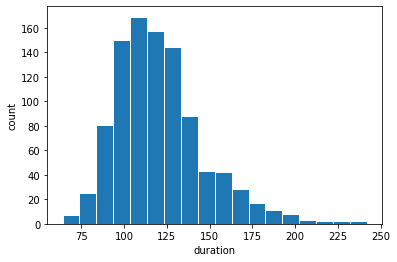

In [11]:
# using loc method- create histogram using loc method
#1. grab all duations so we will have a series
#2. plot with a histogram

movies.loc[:,"duration"].plot(kind='hist',bins=bin_nbr, edgecolor='white');
plt.ylabel('count');
plt.xlabel('duration')

Text(0.5, 0, 'duration')

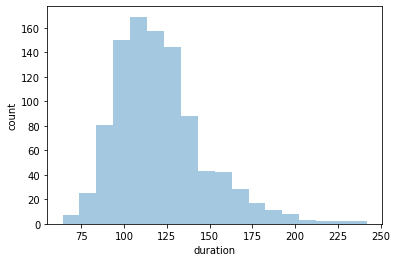

In [65]:
sns.distplot(a=movies["duration"],kde=False,bins=18)
plt.ylabel('count');
plt.xlabel('duration')

#### Use a box plot to display that same data.

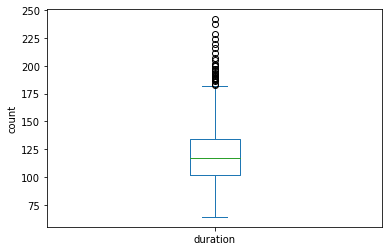

In [12]:
# Answer:Use a box plot to display that same data --loc method
movies.loc[:,"duration"].plot(kind='box');
plt.ylabel('count');


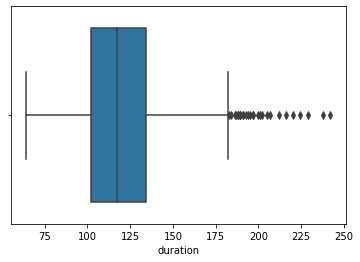

In [92]:
sns.boxplot(x="duration",data=movies);

## Intermediate level

#### Count how many movies have each of the content ratings.

#### Use a visualization to display that same data, including a title and x and y labels.

In [13]:
count_rating = pd.DataFrame(movies[["content_rating"]].value_counts(),columns=["Count"])
count_rating.index.name = "Column"
count_rating.sort_values(["Count"],ascending=False)

,Count
content_rating,
R,460
PG-13,189
PG,123
NOT RATED,65
APPROVED,47
UNRATED,38
G,32
NC-17,7
PASSED,7


In [14]:
#Get the column list
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

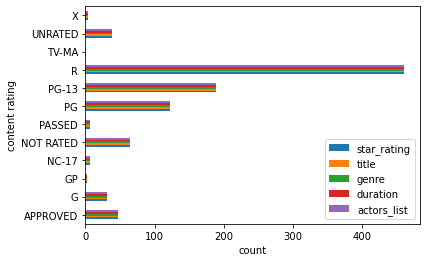

In [15]:
#Manully assign column list to the cols variable
cols = [ 'star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list']

#Group entire dataframe by content_rating 
#Get total count for each content_rating
movies[cols].groupby('content_rating').count().plot(kind='barh');#,figsize=(5,4)

#Assign axis labels
plt.ylabel('content rating');
plt.xlabel('count');

<AxesSubplot:xlabel='content_rating', ylabel='count'>

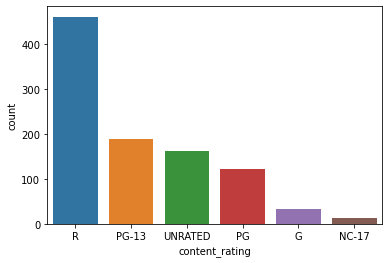

In [62]:
sns.countplot(x="content_rating", data=movies)

In [ ]:
sns.countplot(x="",y="",data=movies)

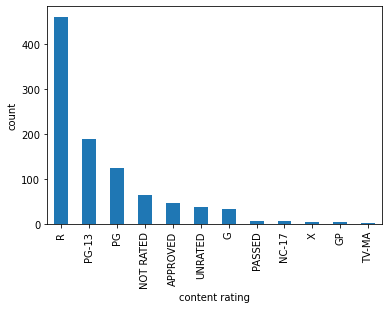

In [16]:
# Another visual using count dataframe from previous step
#Use a horizontal bar chart to show count for each content_rating category

movies["content_rating"].value_counts().plot(kind='bar')

#Assign axis labels
plt.ylabel('count');
plt.xlabel('content rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [17]:
#Lets get the current count for target content ratings before making the 
#change so I can have something to compare

before_apply = movies["content_rating"].isin(["GP","NOT RATED","APPROVED","PASSED"]) 

movies.loc[before_apply].count()

star_rating       122
title             122
content_rating    122
genre             122
duration          122
actors_list       122
dtype: int64

In [18]:
#Get a count before you run the update. Notice count is 38 for UNRATED  

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [19]:
def convert_unrated(x):
    if x == 'GP' or x == 'NOT RATED'or x == 'APPROVED' or x == 'PASSED':
       return 'UNRATED'
    else: return x    

In [20]:
movies["content_rating"] = movies["content_rating"].map(lambda x:  convert_unrated(x))


In [21]:


#Verified Results
mask = movies["content_rating"] == "APPROVED"
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list


In [22]:
#Verified Results using counts:  
#able to confirm 0 counts for ratings: "GP","NOT RATED","APPROVED","PASSED"
after_apply = movies["content_rating"].isin(["GP","NOT RATED","APPROVED","PASSED"]) 

movies.loc[after_apply].count()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [23]:
#Verified:  Can also confirm these ratings "GP","NOT RATED","APPROVED", and "PASSED"
#are no  longer listed in the movie count for content rating.  

#Notice: count for  UNRATED is now 160

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [24]:
#Get counts before apply
before_apply = movies["content_rating"].isin(["X","TV-MA"]) 

movies.loc[before_apply].count()

star_rating       5
title             5
content_rating    5
genre             5
duration          5
actors_list       5
dtype: int64

In [25]:
#Get a count before you run the update. Notice NC-17 count is 7

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

In [26]:
#Will use the dictionary method here to show I know how to do it!

def convert_rating(rating):
    rating_dict = {
         "X":   "NC-17",
        "TV-MA": "NC-17"       
    }
     
    try:
        return rating_dict[rating]
    except:
        return rating

In [27]:
# Answer:Apply function convert_rating to convert ratings
movies["content_rating"] = movies["content_rating"].apply(convert_rating)

In [28]:
#Verified Results: confirm this rating has 0 records
mask = movies["content_rating"] == "TV-MA"
movies[mask]

,star_rating,title,content_rating,genre,duration,actors_list


In [29]:
#Verified Results:  Confirm these ratings have 0 counts in content_rating
 
after_apply = movies["content_rating"].isin(["X","TV-MA"]) 

movies.loc[after_apply].count()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [30]:

#Verified:  Can confirm these ratings are no  longer listed: "X","TV-MA". Notice NC-17 is now 12

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [31]:
# Answer: quick count of missing values
null_df = pd.DataFrame(movies.isna().sum(),columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False)

,Count of Nulls
Column,
content_rating,3
star_rating,0
title,0
genre,0
duration,0
actors_list,0


#### If there are missing values: examine them, then fill them in with "reasonable" values. Explain your approach.

In [32]:
#Examine content records with missing values

mask = movies["content_rating"].isna() == True
movies[mask]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [33]:

movies.content_rating.fillna(value="UNRATED", inplace=True)

In [34]:

#  Approach: replacing  missing values with 'UNRATED' using the pd.DataFrame.fillna() method
#Verify counts

movies.fillna(value={"content_rating": 'UNRATED'} ).groupby("content_rating", as_index=False).count() 
 

,content_rating,star_rating,title,genre,duration,actors_list
0,G,32,32,32,32,32
1,NC-17,12,12,12,12,12
2,PG,123,123,123,123,123
3,PG-13,189,189,189,189,189
4,R,460,460,460,460,460
5,UNRATED,163,163,163,163,163


In [35]:
#verify results
movies.filter(items = [187,649,936], axis=0)

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,UNRATED,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,UNRATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [36]:
#verify there are no null values
null_df = pd.DataFrame(movies.isna().sum(),columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False)

,Count of Nulls
Column,
star_rating,0
title,0
content_rating,0
genre,0
duration,0
actors_list,0


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [37]:
#firt set condition for duration >=120
#Select the column while filtering
#get average
cond_ge120 = movies["duration"].ge( 120 ) 

print(f"The average star rating for movies 2 hours or longer is:",movies.loc[cond_ge120,["star_rating"]].mean().iloc[0])


The average star rating for movies 2 hours or longer is: 7.948898678414082


In [38]:
#firt set condition for duration < 120
#Select the column while filtering
#get average
cond_lt120 = movies["duration"].lt( 120 ) 

print(f"The average star rating for movies less than 2 hours is:",movies.loc[cond_lt120,["star_rating"]].mean().iloc[0])

 

The average star rating for movies less than 2 hours is: 7.838666666666657



In comparing the 2 averages, results show movies that have a duration longer than 2 hours have a greater star rating

#### Use a visualization to detect whether there is a relationship between duration and star rating.

Text(0.5, 1.0, 'Duration vs Star Rating with Trend line')

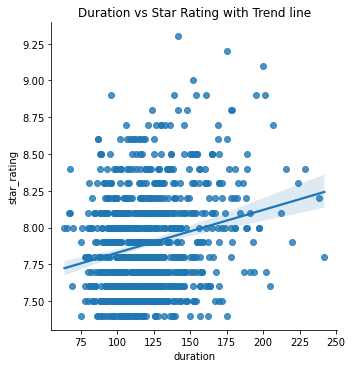

In [95]:
#plot using trend line to show the pattern of data
import seaborn as sns
ax = sns.lmplot(x='duration', y='star_rating',data=movies, fit_reg=True );
plt.title('Duration vs Star Rating with Trend line')

### Scatter plot shows there is no association however the trend shows a prevailing positive trend of longer movies for increased duration

#### Calculate the average duration for each genre.

In [39]:
# Answer:
#1. Group by Genre
#2. Specify column for calculation
#3. Apply aggreation method: mean
 
movies.groupby("genre")[["duration"]].mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

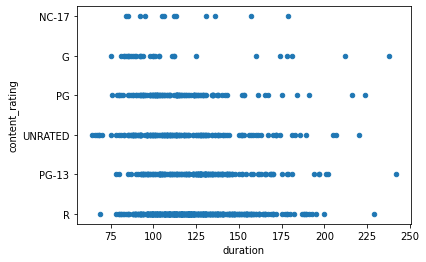

In [40]:
#Use the scatter point plot relationship

movies.plot(kind='scatter', x='duration', y='content_rating');


### I think the scatter plot  shows there is no correlation between content_rating and duration.  However the chart does indicate G movies are short probably because they are kids movies.  Also, it appears the NC-17 movies are least preferred.  This maybe becuase this category is only appropriate for adults.

In [41]:
movies.groupby("content_rating", as_index=False)[["duration"]].describe()

duration                                                           
     count        mean        std   min     25%    50%     75%    max
0     32.0  112.343750  41.232315  75.0   86.75   96.0  112.00  238.0
1     12.0  116.250000  29.422085  84.0   94.25  109.0  132.25  179.0
2    123.0  115.300813  25.558334  76.0   99.50  112.0  125.50  224.0
3    189.0  127.195767  25.545512  78.0  108.00  126.0  139.00  242.0
4    460.0  122.163043  23.373764  69.0  106.00  119.0  134.00  229.0
5    163.0  116.760736  29.336455  64.0   96.00  111.0  130.50  220.0

In [42]:
#plot using trend line to show the pattern of data
ax_plt = movies.groupby(["content_rating"]).agg({"content_rating": "count","duration":"mean"}) 
ax_plt

,content_rating,duration
content_rating,,
G,32,112.343750
NC-17,12,116.250000
PG,123,115.300813
PG-13,189,127.195767
R,460,122.163043
UNRATED,163,116.760736


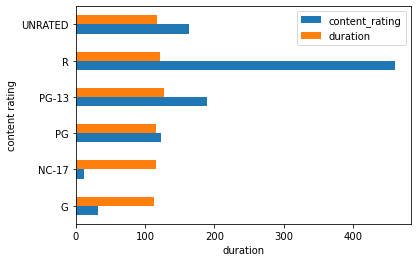

In [116]:
#Manully assign column list to the cols variable
cols = [ 'star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list']

#Group entire dataframe by content_rating 
#Get total count for each content_rating
movies[cols].groupby('content_rating').agg({"content_rating": "count","duration":"mean"}).plot(kind='barh');#,figsize=(5,4)

#Assign axis labels
plt.ylabel('content rating');
plt.xlabel('duration');

### Bar charts are not good to show relationships typically.  I understand they are good to show distribution of data however I saw outliners so much better on this chart.  I also wanted to see how the rating and duration stack up against each other and if there was a visible pattern. This bar chart is shows regardless of content rating, the duration is the same.  In summary, this confirms there is no association betwen the  duration and the content rating

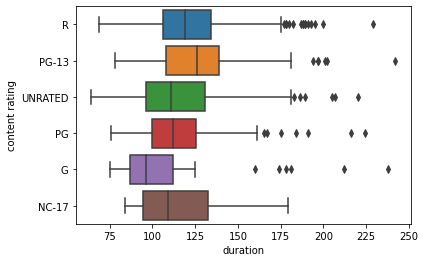

In [47]:
# content rating and duration plot
#Group by Content rating
sns.boxplot(x="duration",y="content_rating",data=movies);
plt.xlabel('duration');
plt.ylabel('content rating');

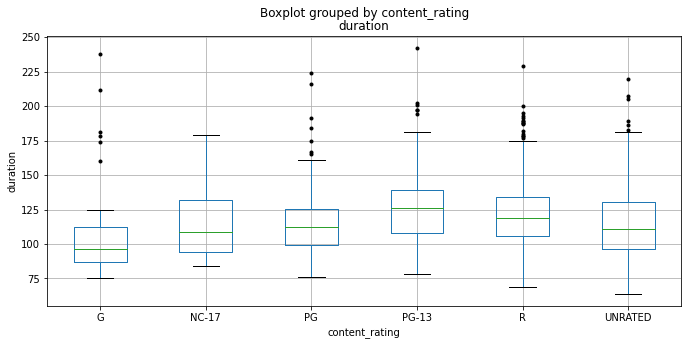

In [44]:
# content rating and duration plot
#Group by Content rating

movies.boxplot(column='duration', by='content_rating', figsize=(11,5), sym='k.');

plt.xlabel('content_rating');
plt.ylabel('duration');
 
 

### The BOXPLOTs show all movies have a duration between 96 - 127 minutes.  The boxplots are not showing me any outliners like the affect of the minimum and maximum  duration affecting the content rating.  In conclusion, there is no relationship between duration and content_rating 

#### Determine the top rated movie (by star rating) for each genre.

In [45]:
# Answer:
#1.Group by Genre
#2 add columns to aggregate
#3 apply max aggregate to get the top rate movies per genre


movies.groupby("genre")[["title","star_rating"]].max().sort_values('star_rating', ascending=False)

,title,star_rating
genre,,
Crime,Zodiac,9.3
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Biography,Walk the Line,8.9
Drama,Zulu,8.9
Western,Unforgiven,8.9
Animation,Wreck-It Ralph,8.6
Comedy,Zombieland,8.6
Horror,[Rec],8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [73]:
# Answer:

#First get a count of all the titles
df_title_count = movies.groupby('title',as_index=True)[["title"]].count()

#Second, create a condition to filter only duplicate titles
mask = df_title_count["title"] > 1
df_title_count[mask]

#third, convert theindex name to a list of title names
list(df_title_count[mask].index)

['Dracula', 'Les Miserables', 'The Girl with the Dragon Tattoo', 'True Grit']

In [82]:

#Use list of names to filter the entire dataframe to check if the titles are actually duplicates
#sort by title
cond = movies["title"].isin(list(df_title_count[mask].index))
movies[cond].sort_values(by="title",ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


### Based on my results, there are 4 movies with duplicate titles but they are not actually duplicates.  These movies have different actors and duration times.  A couple of the movies even have different ratings.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [83]:
#First get a count of all genres
df_genre_count = movies.groupby('genre',as_index=True)[["genre"]].count()

#Second, create a condition to filter only genres greater than equal to 10
mask = df_genre_count["genre"] >= 10
df_genre_count[mask]

#third, convert theindex name to a list of title names
list(df_genre_count[mask].index)

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Horror',
 'Mystery']

In [85]:
#Manually create a list of relavant genre's
manual_list =['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Horror',
 'Mystery']

In [87]:
cond = movies["genre"].isin(manual_list)
movies[cond].groupby("genre")[["genre","star_rating"]].mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [99]:
movies_counts_df = pd.DataFrame(movies['genre'].value_counts())
movies_counts_df.T

,Drama,Comedy,Action,Crime,Biography,Adventure,Animation,Horror,Mystery,Western,Sci-Fi,Thriller,Film-Noir,Family,History,Fantasy
genre,278,156,136,124,77,75,62,29,16,9,5,5,3,2,1,1


In [122]:
#filter without using a loop... how??
#first Transpose then set the condition greater than 10
movies_counts_df.T.columns

result= movies_counts_df.T[movies_counts_df.T >= 10] 
#drop null values from the list

#Drop columns with NaN values using axis=1
result.dropna(axis=1).columns 

  

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

In [123]:
#filter using relevant genre list
cond = movies["genre"].isin(list(result.dropna(axis=1).columns))
movies[cond].groupby("genre")[["genre","star_rating"]].mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [124]:
avg_star_rating = pd.DataFrame(movies.groupby("genre")[["genre","star_rating"]].mean())
avg_star_rating 

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


In [135]:
cond = movies["genre"].value_counts().ge(10) 

In [136]:
avg_star_rating [cond]

C:\Users\melmi\AppData\Local\Temp\ipykernel_7860\1586548785.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_star_rating [cond]


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [137]:

 

gb_genre = movies.groupby(['genre'], as_index=False)[['star_rating','genre']]
gb_genre

In [138]:
result =  gb_genre.agg({'star_rating':['mean'],'genre':'count'})  
result 

,star_rating,genre
,mean,count
0,7.884559,136
1,7.933333,75
2,7.914516,62
3,7.862338,77
4,7.822436,156
5,7.916935,124
6,7.902518,278
7,7.850000,2
8,7.700000,1


In [139]:
#rename column to get a single column index
df_result =(gb_genre
 .agg(star_rating_mean =('star_rating','mean'),
      genre_count = ('genre','count'))
 
)
df_result.query("genre_count >= 10")

,genre,star_rating_mean,genre_count
0,Action,7.884559,136
1,Adventure,7.933333,75
2,Animation,7.914516,62
3,Biography,7.862338,77
4,Comedy,7.822436,156
5,Crime,7.916935,124
6,Drama,7.902518,278
11,Horror,7.806897,29
12,Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [64]:
movies["actors_list"].value_counts().sort_values

<bound method Series.sort_values of [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          3
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  2
                                                             ..
[u'Natalie Portman', u'Mila Kunis', u'Vincent Cassel']        1
[u'Brad Garrett', u'Lou Romano', u'Patton Oswalt']            1
[u'John Wayne', u'Jeffrey Hunter', u'Vera Miles']             1
[u'Brie Larson', u'Frantz Turner', u'John Gallagher Jr.']     1
[u'Charlie Sheen', u'Michael Douglas', u'Tamara Tunie']       1
Name: actors_list, Length: 969, dtype: int64>

### Interesting to know Daniel Radcliffe ,   Emma Watson , and Rupert Grint have appeared in 6 movies together